In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
data = pd.read_csv("/content/agricultural_yield.csv")
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [19]:
 x = data[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
 y = data[['Yield_kg_per_hectare']]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
#Mean Squared Error and Mean Absolute Error

In [23]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 274913.9062 - mae: 459.1775 - val_loss: 51344.4414 - val_mae: 178.9776
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50011.2695 - mae: 180.7302 - val_loss: 48541.2539 - val_mae: 175.8128
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47251.5703 - mae: 176.3365 - val_loss: 44495.2383 - val_mae: 167.7108
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 42509.2188 - mae: 166.6330 - val_loss: 40432.3125 - val_mae: 159.6098
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39353.5430 - mae: 161.0781 - val_loss: 36988.5820 - val_mae: 152.7134
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37621.2227 - mae: 156.7400 - val_loss: 36473.7227 - val_mae: 154.5089
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34560.1797 - mae: 151.9857 - val_loss: 31560.0879 - val_mae: 140.6047
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33622.1289 - mae: 149.9536 - val_loss: 29486.

In [24]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3037.6934 - mae: 44.2874 
Test Loss: 2810.644287109375, Test MAE: 42.18491744995117


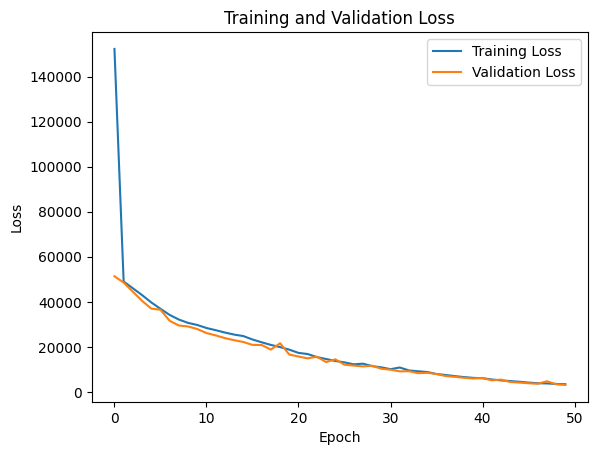

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-30-f920ce905716>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-30-f920ce905716>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


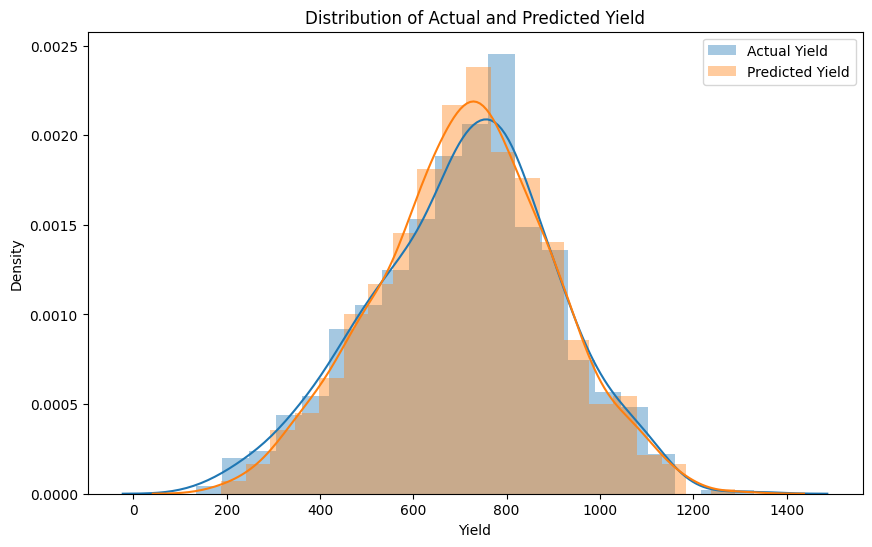

In [30]:
# Distribution plots
y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

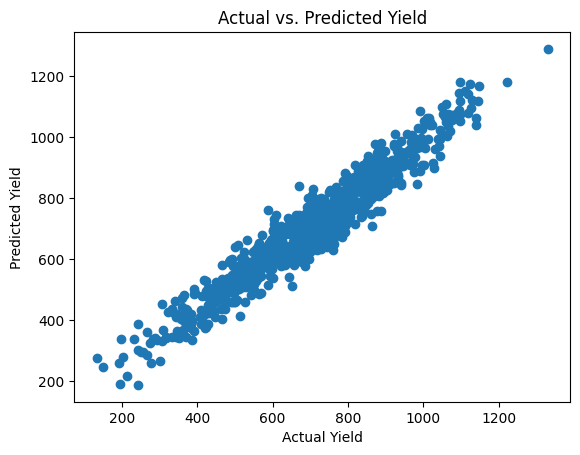

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Yield")
plt.show()
